<a href="https://colab.research.google.com/github/JoseEduardoGoulart/Python-Studies-/blob/main/1APJos%C3%A9Eduardo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Atividade da 1°AP ICA - José Eduardo Goulart

##Importando bibliotecas necessárias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
from scipy import linalg
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

##Importando o DataSet da iris

In [ ]:
iris = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
iris.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


##Fatorizando o dataset iris

In [ ]:
LABELS = iris["variety"].unique()
iris.variety = pd.factorize(iris.variety)[0]
X = np.array(iris.iloc[:,2:4])
d = np.array(iris.iloc[:,-1])

##Análise dos classificadores

###Configurando gráficos

In [ ]:
def test_plot(X, y_pred, clf):
  X0T = X[d == 0]
  X1T = X[d == 1]
  X2T = X[d == 2]

  X0P = X[y_pred == 0]
  X1P = X[y_pred == 1]
  X2P = X[y_pred == 2]

  plt.figure(figsize=(15, 5))

  for a in np.linspace(0,7,25):
    for b in np.linspace(0,3,25):
      y = clf.predict([[a,b]])
      cor = ['gray','black', 'purple']
      plt.scatter(a,b, marker=".", color = cor[y[0]])

  plt.scatter(X0T[:, 0], X0T[:, 1], marker="s", color="blue",edgecolors="blue")
  plt.scatter(X1T[:, 0], X1T[:, 1], marker="s", color="green",edgecolors="green")
  plt.scatter(X2T[:, 0], X2T[:, 1], marker="s", color="red",edgecolors="red")

  plt.scatter(X0P[:, 0], X0P[:, 1], marker=".", color="blue", alpha=0.5)
  plt.scatter(X1P[:, 0], X1P[:, 1], marker=".", color="green", alpha=0.5)
  plt.scatter(X2P[:, 0], X2P[:, 1], marker=".", color="red", alpha=0.5)

  plt.show()

###Análise do classificador LDA

In [ ]:
clf = LinearDiscriminantAnalysis(store_covariance=True)
clf_pred = clf.fit(X, d).predict(X)

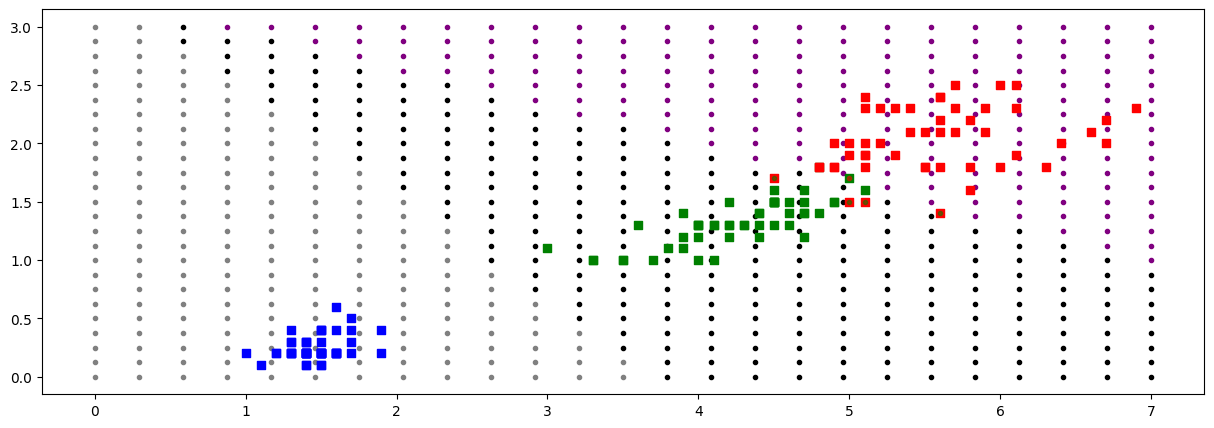

In [ ]:
test_plot(X, clf_pred, clf)

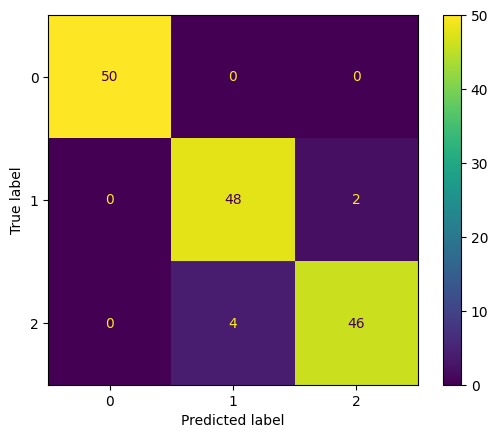

0.96


In [ ]:
confusion_matrix(d,clf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix(d,clf_pred))
disp.plot()
plt.show()
print(clf.score(X, d))

###Análisedo classificador QDA

In [ ]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_pred = qda.fit(X, d).predict(X)

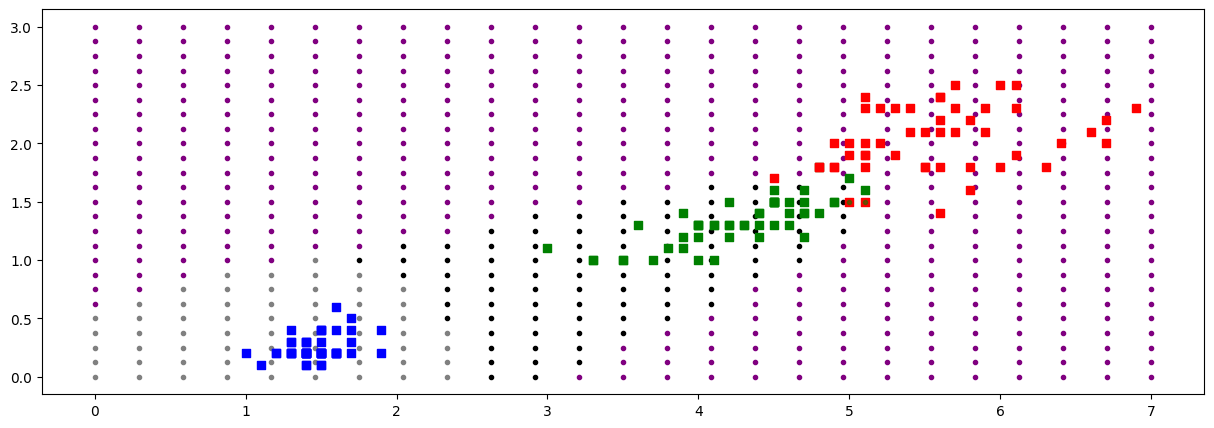

In [ ]:
test_plot(X, y_pred, qda)

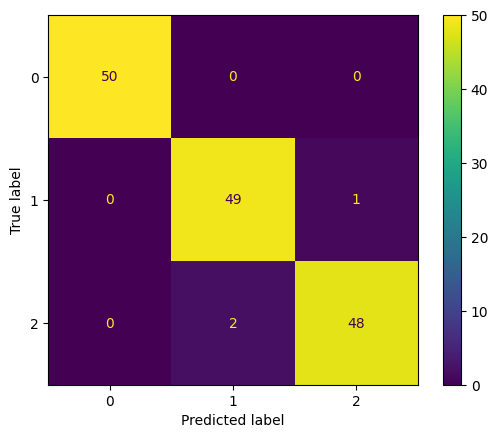

0.98


In [ ]:
confusion_matrix(d,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix(d,y_pred))
disp.plot()
plt.show()
print(qda.score(X, d))

###Análise do classificador KNN

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
y_pred2 = neigh.fit(X, d).predict(X)

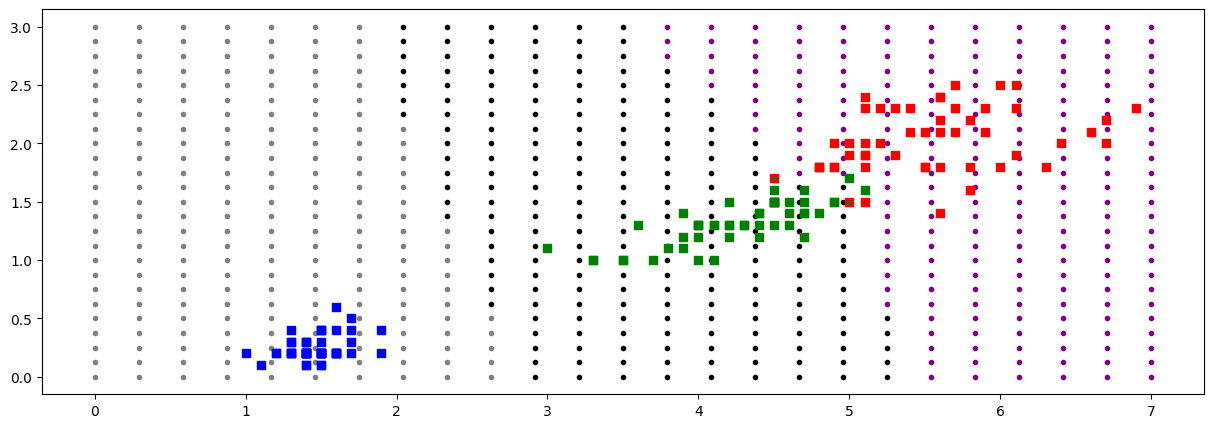

In [ ]:
test_plot(X, y_pred2, neigh)

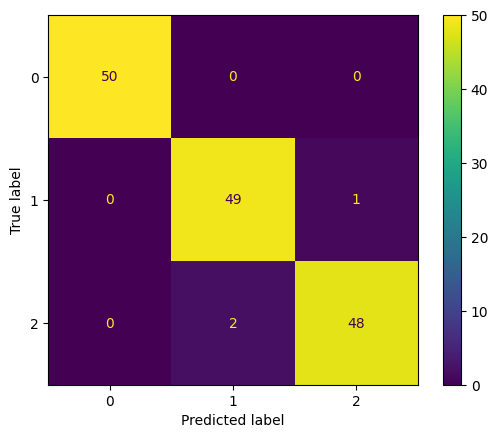

0.98


In [ ]:
confusion_matrix(d,y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix(d,y_pred2))
disp.plot()
plt.show()
print(neigh.score(X, d))

##Validação cruzada dos classificadores

In [ ]:
iris = sns.load_dataset('iris')

features = np.array(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values)
target = np.array(iris['species'].values)

def k_fold_cross_validation(model, x, y, n_folds=10, shuffle=True):

    kf = KFold(n_splits=n_folds)

    results_accuracy = []


    for train, test in kf.split(x, y):
        data_train, target_train = x[train], y[train]
        data_test, target_test   = x[test], y[test]

        model = model.fit(data_train, target_train)
        out = model.predict(data_test)

        accuracy = accuracy_score(target_test, out)
        results_accuracy.append(accuracy)
        confusion_matrix(y[test], out)

#   print('Média de acerto')
#   print(np.average(results_accuracy))
#   print('Desvio padrão')
#   print(np.std(results_accuracy))
#   print(results_accuracy)

    return results_accuracy, np.average(results_accuracy), np.std(results_accuracy)

##Gráfico tipo box plot mostrando os 3 classificadores

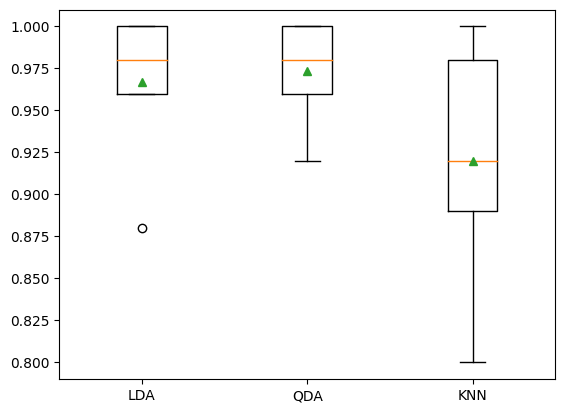

In [ ]:
ldaACC, ldaAVG, ldaSTD = k_fold_cross_validation(model=clf, x=features, y=target, n_folds=6)
qdaACC, qdaAVG, qdaSTD = k_fold_cross_validation(model=qda, x=features, y=target, n_folds=6)
neighACC, neighAVG, neighSTD = k_fold_cross_validation(model=neigh, x=features, y=target, n_folds=6)

plt.boxplot([ldaACC, qdaACC, neighACC], labels=['LDA','QDA','KNN'], showmeans=True)
plt.show()

##Tabela contendo o desvio,média e erro dos 3 classificadores

In [ ]:
resultData = {
    'MODELO': ["LDA","QDA", "KNN"],
    'MÉDIA' : [ldaSTD,qdaSTD,neighSTD],
    'DESVIO':[ldaAVG,qdaAVG,neighAVG],
    }

desDF = pd.DataFrame.from_dict(resultData)
desDF.style.hide_index()
desDF

<ipython-input-16-be1a0b6c7070>:8: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  desDF.style.hide_index()


,MODELO,MÉDIA,DESVIO
0,LDA,0.042687,0.966667
1,QDA,0.029814,0.973333
2,KNN,0.069282,0.920000


##Conclusão

Como foi visto no programa utilizamos 3 classificadores (LDA,QDA e KNN) para classificarmos o dataset da iris que contem 150 amostras de 3 tipos de plantas onde que a tarefa de cada classificador seria classificar essas espécies de plantas. Portanto conseguimos dados sobre os 3 classificadores sendo eles seu desvio padrão, média e accuracy.


Podemos identificar que como se trata de um dataset relativamente pequeno e com dados simples todos os classificadores tiveram uma grande porcentagem de acerto mas de formas distintas de como classificaram o dataset. Podemos ver que dos 3 classificadores todos cometeram pequenos erros mas o QDA e KNN tiveram um desvio maior em relação a sua accuracy. Então o LDA teve uma precisão maior.


Portanto o classificador escolhido foi o LDA que com os testes para mim foi o melhor classificador devido a sua precisão geral e por ser tratar de um classificador mais simples para a situação.